# FALLAS EN EL DESARROLLO DE EIGEN FACES

by Diego Sánchez

"""
Demostración de la influencia del tamaño de las fotos y las formas de los rostros en las distancias en bases de datos

Este código tiene como objetivo explorar cómo el tamaño de las fotos y las formas de los rostros influyen en las distancias calculadas en bases de datos de reconocimiento facial. Se utilizará una base de datos de rostros para realizar una comparación de similitud utilizando diferentes tamaños de imágenes y formas de rostros.

La hipótesis principal es que el tamaño de las fotos y las formas de los rostros pueden afectar significativamente las distancias calculadas en el reconocimiento facial. 

El código implementará una serie de pasos, que incluyen:
1. Carga de una base de datos de rostros con imágenes de diferentes tamaños y formas que busca clasificar hombres y mujeres.
2. Extracción de características faciales utilizando eigen faces.
4. predicción por medio del valor obtenido.

Esta demostración espera obtener una mejor comprensión de cómo el tamaño de las fotos y las variaciones en las formas de los rostros pueden influir en las distancias calculadas en bases de datos de reconocimiento facial. Esto puede ayudar a tomar decisiones informadas en el diseño y desarrollo de sistemas de reconocimiento facial más robustos y precisos.




In [58]:
from PIL import Image
import os
import numpy as np
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Rutas de las carpetas de hombres y mujeres
ruta_hombres = '/content/drive/MyDrive/asia/male'
ruta_mujeres = '/content/drive/MyDrive/asia/female'
ruta_testeo = '/content/drive/MyDrive/asia/test'

In [61]:
# Listas para almacenar los datos de las imágenes
datos_hombres = []
datos_mujeres = []
datos_testeo = []

# Leer imágenes de hombres
for filename in os.listdir(ruta_hombres):
    if filename.endswith('.png'):
        ruta_imagen = os.path.join(ruta_hombres, filename)
        imagen = Image.open(ruta_imagen)
        datos = np.array(imagen)
        datos_hombres.append(datos)

# Leer imágenes de mujeres
for filename in os.listdir(ruta_mujeres):
    if filename.endswith('.png'):
        ruta_imagen = os.path.join(ruta_mujeres, filename)
        imagen = Image.open(ruta_imagen)
        datos = np.array(imagen)
        datos_mujeres.append(datos)

# Leer imágenes de testeo
for filename in os.listdir(ruta_testeo):
    if filename.endswith('.png'):
        ruta_imagen = os.path.join(ruta_testeo, filename)
        imagen = Image.open(ruta_imagen)
        datos = np.array(imagen)
        datos_testeo.append(datos)


In [62]:
# transformación eigen faces
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA

# Obtener los datos de las imágenes (por ejemplo, datos_hombres y datos_mujeres)
datos = datos_hombres + datos_mujeres

# Convertir los datos de las imágenes en un arreglo NumPy
datos = np.array(datos)

# Obtener las dimensiones de los datos
num_imagenes, altura, anchura, canales = datos.shape

# Reformatear los datos para que sean un arreglo 2D (num_imagenes x num_caracteristicas)
datos_2d = datos.reshape(num_imagenes, altura * anchura * canales)

# Realizar el análisis de componentes principales (PCA)
pca = PCA(n_components=num_imagenes)
pca.fit(datos_2d)

eigenfaces = pca.components_.reshape(-1, altura, anchura, canales)

print(eigenfaces.shape)


(20, 1080, 1080, 4)


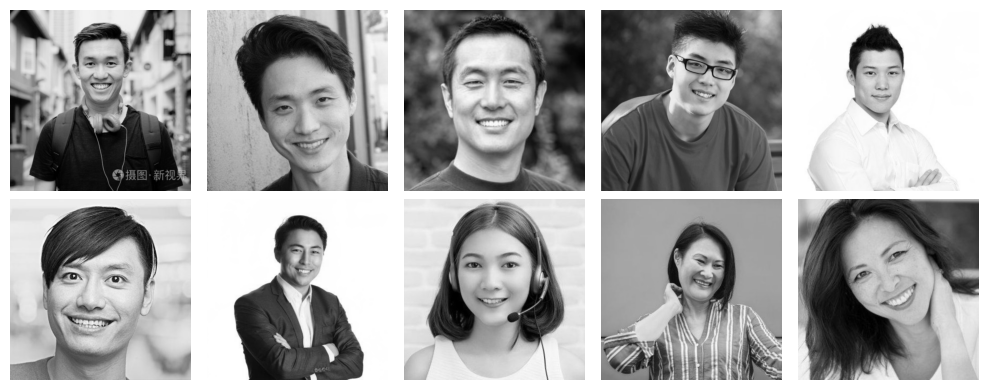

In [63]:
imagenes_transformadas = pca.transform(datos_2d)

# Definir el número de componentes principales a utilizar en la reconstrucción
num_componentes = 340000

# Reconstruir las imágenes utilizando el número de componentes especificado
imagenes_reconstruidas = pca.inverse_transform(imagenes_transformadas[:, :num_componentes])
imagenes_reconstruidas = imagenes_reconstruidas.reshape(-1, altura, anchura, canales)

# Crear una figura con subtramas para mostrar las imágenes
fig, axs = plt.subplots(2, 5, figsize=(10, 4))

# Visualizar las primeras 10 imágenes reconstruidas
for i, ax in enumerate(axs.flatten()):
    imagen_reconstruida = imagenes_reconstruidas[i]
    ax.imshow(imagen_reconstruida.astype(np.uint8))
    ax.axis('off')

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()


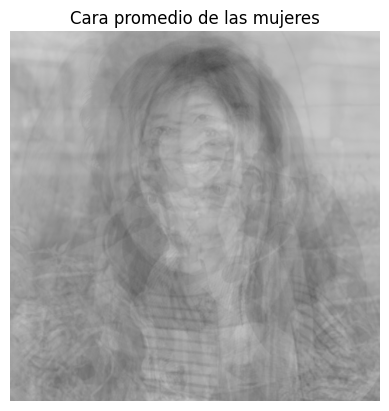

In [64]:
# cara promedio mujeres
datos_mujeres = np.array(datos_mujeres)

# Calcular la cara promedio de las mujeres
cara_promedio = np.mean(datos_mujeres, axis=0)

# Graficar la cara promedio
plt.imshow(cara_promedio.astype(np.uint8))
plt.axis('off')
plt.title('Cara promedio de las mujeres')
plt.show()

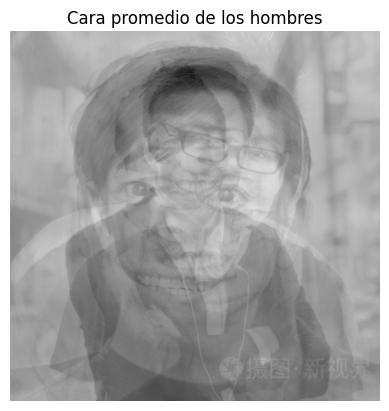

In [65]:
# cara promedio hombres
datos_hombres = np.array(datos_hombres)

# Calcular la cara promedio de las mujeres
cara_promedio = np.mean(datos_hombres, axis=0)

# Graficar la cara promedio
plt.imshow(cara_promedio.astype(np.uint8))
plt.axis('off')
plt.title('Cara promedio de los hombres')
plt.show()

In [66]:
# Obtener los datos de entrenamiento de hombres y mujeres (por ejemplo, datos_hombres y datos_mujeres)
datos_entrenamiento = np.concatenate((datos_hombres, datos_mujeres))
etiquetas_entrenamiento = np.concatenate((np.zeros(len(datos_hombres)), np.ones(len(datos_mujeres))))

# Reformatear los datos de entrenamiento
datos_entrenamiento_2d = datos_entrenamiento.reshape(datos_entrenamiento.shape[0], -1)

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(datos_entrenamiento_2d, etiquetas_entrenamiento)

# Obtener los datos de prueba a clasificar
datos_testeo = np.array(datos_testeo)  # Reemplaza "datos_prueba" con tus propios datos de prueba
datos_prueba_2d = datos_testeo.reshape(datos_testeo.shape[0], -1)

# Realizar la clasificación en los datos de prueba
predicciones22 = modelo_svm.predict(datos_prueba_2d)

# Imprimir las predicciones
for prediccion in predicciones:
    if prediccion == 0:
        print("Hombre")
    else:
        print("Mujer")


Mujer
Mujer
Hombre
Hombre
Hombre
Hombre
Hombre
Mujer
Mujer
Mujer
Mujer
Hombre
Hombre
Mujer


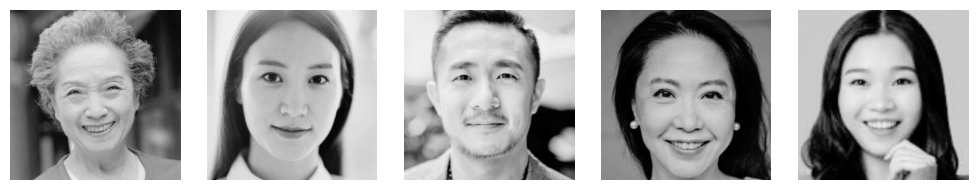

In [67]:
predicciones = modelo_svm.predict(datos_prueba_2d)

# Filtrar las imágenes clasificadas como mujeres
imagenes_mujeres = datos_testeo[predicciones == 1]

# Crear una figura con subtramas para mostrar las imágenes
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

# Visualizar las primeras 5 imágenes clasificadas como mujeres
for i, ax in enumerate(axs.flatten()):
    imagen_mujer = imagenes_mujeres[i]
    ax.imshow(imagen_mujer.astype(np.uint8))
    ax.axis('off')

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

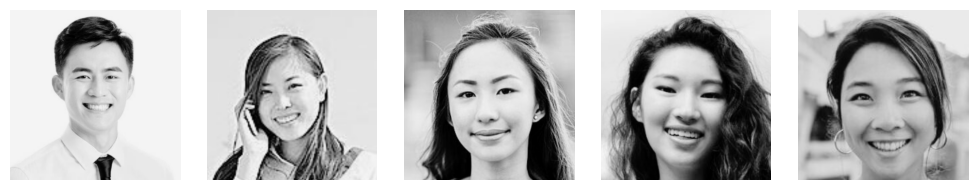

In [68]:
predicciones = modelo_svm.predict(datos_prueba_2d)

# Filtrar las imágenes clasificadas como hombres
imagenes_hombres = datos_testeo[predicciones == 0]

# Crear una figura con subtramas para mostrar las imágenes
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

# Visualizar las primeras 5 imágenes clasificadas como mujeres
for i, ax in enumerate(axs.flatten()):
    imagen_hombre = imagenes_hombres[i]
    ax.imshow(imagen_hombre.astype(np.uint8))
    ax.axis('off')

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

se puede evidenciar que la herramienta logro una clasifcación de las imagenes por el tamaño del rostro en este caso la importancia de los rostros era clave para el desarrollo de la herramienta.
